In [33]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, RocCurveDisplay

In [10]:
iris_data= datasets.load_iris()


In [13]:
x,y = iris_data.data[:, :2], iris_data.target

In [14]:
#split into training/test set
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=5)

In [15]:
#preprocess data
scalar= preprocessing.StandardScaler().fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)


In [16]:
#supervised learning
#KNN classification
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
#model fit
knn.fit(x_train, y_train)
#prediction
y_pred = knn.predict(x_test)
#evaluate
accuracy_score(y_test,y_pred)

0.7894736842105263

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.71      0.71      0.71        14
           2       0.67      0.67      0.67        12

    accuracy                           0.79        38
   macro avg       0.79      0.79      0.79        38
weighted avg       0.79      0.79      0.79        38

[[12  0  0]
 [ 0 10  4]
 [ 0  4  8]]


<Axes: >

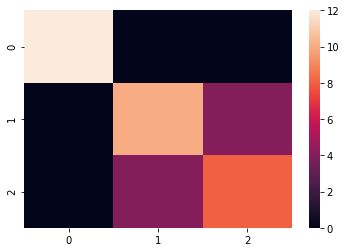

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred))

In [18]:
#LR
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression().fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
accuracy_score(y_test,y_pred_lr)

0.868421052631579

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      0.86      0.83        14
           2       0.82      0.75      0.78        12

    accuracy                           0.87        38
   macro avg       0.87      0.87      0.87        38
weighted avg       0.87      0.87      0.87        38

[[12  0  0]
 [ 0 12  2]
 [ 0  3  9]]


<Axes: >

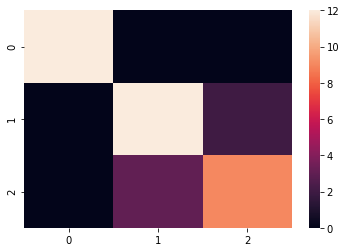

In [24]:
print(classification_report(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))
sns.heatmap(confusion_matrix(y_test,y_pred_lr))

In [20]:
#SVC
from sklearn.svm import SVC
sv= SVC(kernel='linear').fit(x_train,y_train)
y_pred_svc = sv.predict(x_test)
accuracy_score(y_test,y_pred_svc)

0.8421052631578947

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.75      0.86      0.80        14
           2       0.80      0.67      0.73        12

    accuracy                           0.84        38
   macro avg       0.85      0.84      0.84        38
weighted avg       0.84      0.84      0.84        38

[[12  0  0]
 [ 0 12  2]
 [ 0  4  8]]


<Axes: >

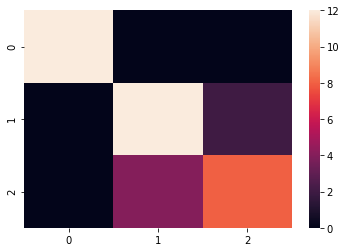

In [25]:
print(classification_report(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))
sns.heatmap(confusion_matrix(y_test,y_pred_svc))

In [29]:
# we can treat the irirs dataset as unsupervised learning task. 
# not knowing the taxonomy. 
#use k-means to classify them into clusters

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train)
print(kmeans.labels_[::10]) # classification prediction
print(y_train[::10]) #actual labels


[0 2 1 2 0 2 0 2 0 2 2 2]
[0 2 1 2 0 2 0 2 0 1 1 2]


In [30]:
y_pred_kmeans= kmeans.predict(x_test)
accuracy_score(y_test,y_pred_kmeans)

0.8421052631578947

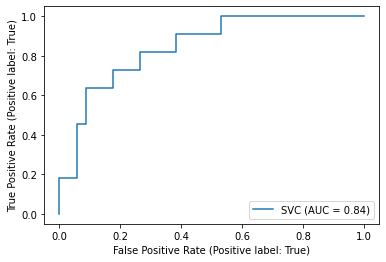

In [39]:
#ROC curve-shows performance of classification model
#we will use from_estimator method which will take a fitted estimator
#amd some data (x,y) and create a display
# we can use from_predictions to compute the predictions

x_wine,y_wine = datasets.load_wine(return_X_y=True)
# make it binary
y_wine=y_wine==2
x_w_tr, x_w_te, y_w_tr,y_w_te = train_test_split(x_wine,y_wine,random_state=30)
svc=SVC().fit(x_w_tr,y_w_tr)
disp = RocCurveDisplay.from_estimator(svc, x_w_te,y_w_te)

AUC is an effective way to summarize the overall diagnostic accuracy of the test. It takes values from 0 to 1, where a value of 0 indicates a perfectly inaccurate test and a value of 1 reflects a perfectly accurate test. Here our AUC = 0.84 is quite excellent.